

1.   For Canny Edge  https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py
For Canny More Details
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html?highlight=edge%20detection
2.   For Sobel Scharr Laplacian
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html?highlight=sobel
3.Also can check this(this is mainly for code)
https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py





In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from google.colab.patches import cv2_imshow
from skimage.filters import sobel
from skimage import filters
from skimage import feature
import glob
import os
import matplotlib as mpl

(1148, 2563, 3)


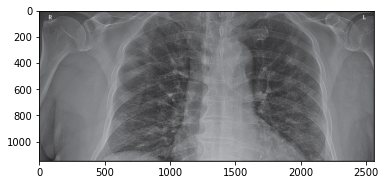

In [ ]:
image = plt.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
print(image.shape)
plt.imshow(image)

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
# image = np.float32(image)
# image /= 255
# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')
out_h = ndimage.convolve(image, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(image, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.


[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


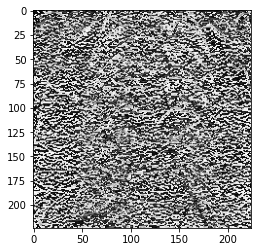

In [ ]:
plt.imshow(out_h, cmap='gray')
#cv2_imshow(out_h)

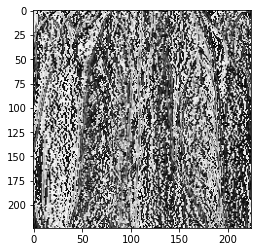

In [ ]:

plt.imshow(out_v, cmap='gray')

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
# image = np.float32(image)
# image /= 255
edge_sobel = sobel(image)

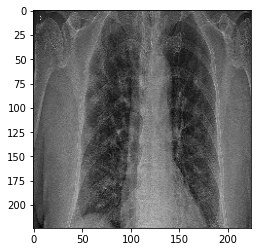

In [ ]:
plt.imshow(image, cmap='gray')

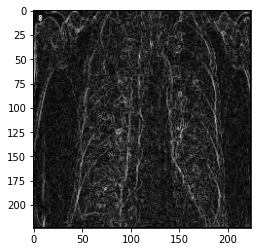

In [ ]:
plt.imshow(edge_sobel, cmap='gray')

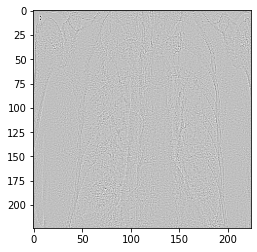

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
image = np.float32(image)
image /= 255
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
out_l = ndimage.convolve(image, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap = 'gray')


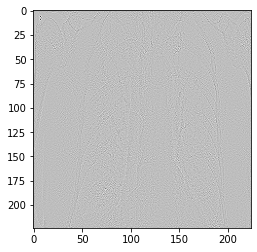

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
laplacian = cv2.Laplacian(image,cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')

In [ ]:

image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))


edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)
edge_scharr = filters.scharr(image)
edge_prewitt = filters.prewitt(image)


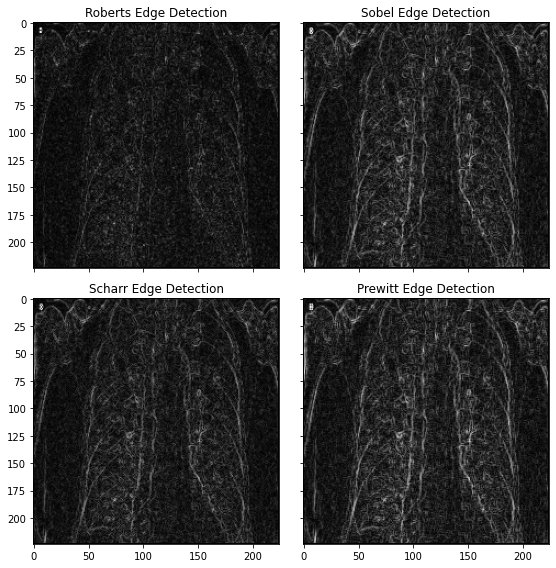

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True ,figsize = (8,8))
axes = axes.ravel()

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(edge_scharr, cmap=plt.cm.gray)
axes[2].set_title('Scharr Edge Detection')

axes[3].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[3].set_title('Prewitt Edge Detection')



plt.tight_layout()
plt.show()

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
edges1 = feature.canny(image)

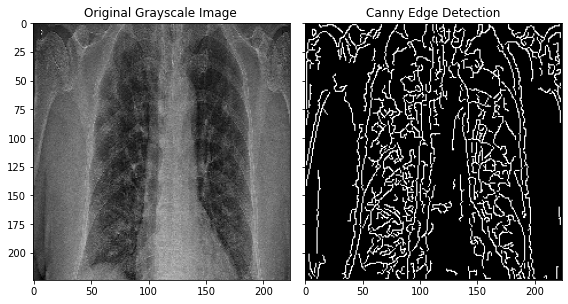

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True ,figsize = (8,8))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Grayscale Image ')

axes[1].imshow(edges1, cmap=plt.cm.gray)
axes[1].set_title('Canny Edge Detection')

plt.tight_layout()
plt.show()

### **Cascade of Median Filter--CLAHE algo--Sobel Edge Detection







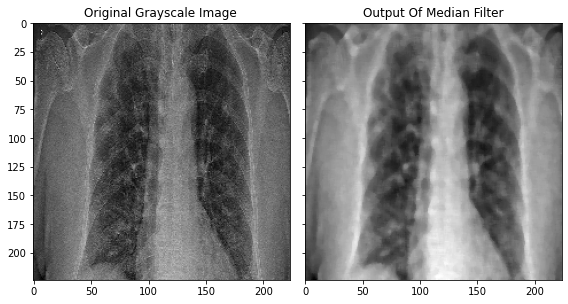

In [ ]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
ImageAfterMedian = cv2.medianBlur(image,5)
#Plotting For Comparison
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True ,figsize = (8,8))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Grayscale Image ')

axes[1].imshow(ImageAfterMedian, cmap=plt.cm.gray)
axes[1].set_title('Output Of Median Filter')

plt.tight_layout()
plt.show()

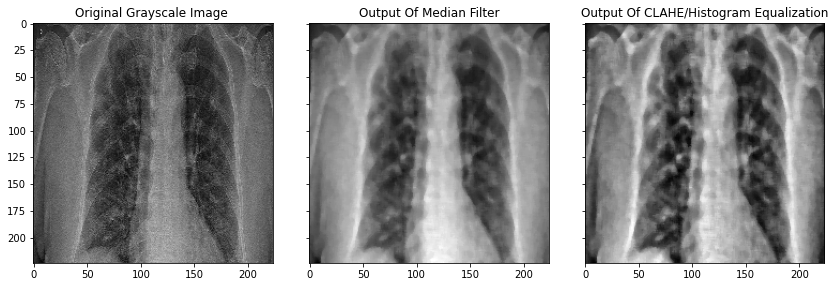

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(ImageAfterMedian)
#Plotting For Comparison
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True ,figsize = (12,12))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Grayscale Image ')

axes[1].imshow(ImageAfterMedian, cmap=plt.cm.gray)
axes[1].set_title('Output Of Median Filter')

axes[2].imshow(cl, cmap=plt.cm.gray)
axes[2].set_title('Output Of CLAHE/Histogram Equalization')

plt.tight_layout()
plt.show()

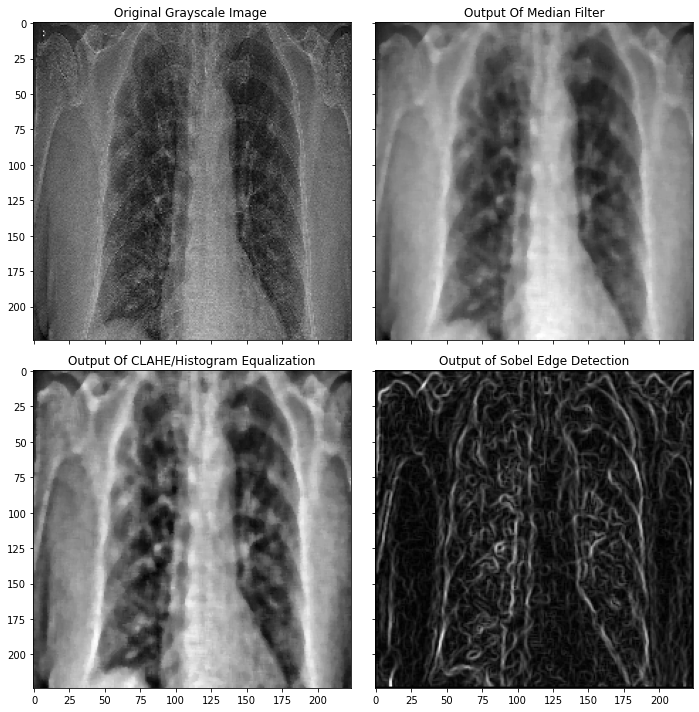

In [ ]:
edge_sobel = filters.sobel(cl)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True ,figsize = (10,10))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Grayscale Image ')

axes[1].imshow(ImageAfterMedian, cmap=plt.cm.gray)
axes[1].set_title('Output Of Median Filter')

axes[2].imshow(cl, cmap=plt.cm.gray)
axes[2].set_title('Output Of CLAHE/Histogram Equalization')

axes[3].imshow(edge_sobel, cmap=plt.cm.gray)
axes[3].set_title('Output of Sobel Edge Detection')

plt.tight_layout()
plt.show()

# **Cascade of CLAHE -- Sobel **

In [ ]:
imagesall = glob.glob('/content/drive/My Drive/final_dataset/normal/*')
for k in range(len(imagesall)):
  if k< 10:

    image = cv2.imread(imagesall[k])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
# image = np.float32(image)
# image /= 255
#ImageAfterMedian = cv2.medianBlur(image,5)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(image)
    edge_sobel = filters.sobel(cl)
#Plotting For Comparison
    # fig, axes = plt.subplots(figsize = (12,12))
    # axes = axes.ravel()
    # axes.imshow(edge_sobel , cmap=plt.cm.gray)
    # axes.set_title('Preprocessed Image{}'.format(k))
    plt.figure(figsize=(12,12))
    plt.imshow(edge_sobel ,cmap ='gray')
    plt.title('Preprocessed Image{}'.format(k+1))


    plt.savefig(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results/2ndROC', 'Preprocessed Image{}.png'.format(k+1)))
    plt.tight_layout()
    plt.show()

In [ ]:
cl.shape

(224, 224)

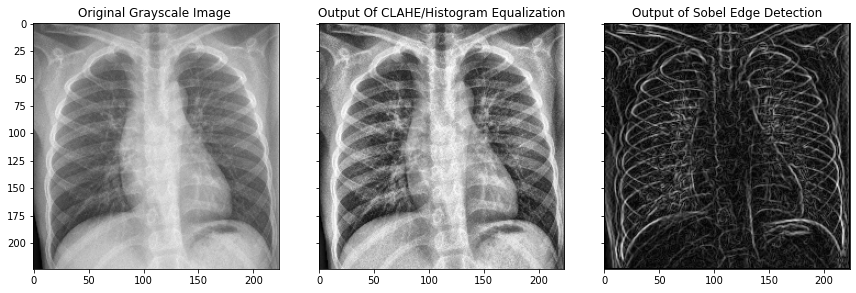

In [ ]:
edge_sobel = filters.sobel(cl)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True ,figsize = (12,12))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Grayscale Image ')

# axes[1].imshow(ImageAfterMedian, cmap=plt.cm.gray)
# axes[1].set_title('Output Of Median Filter')

axes[1].imshow(cl, cmap=plt.cm.gray)
axes[1].set_title('Output Of CLAHE/Histogram Equalization')

axes[2].imshow(edge_sobel, cmap=plt.cm.gray)
axes[2].set_title('Output of Sobel Edge Detection')

plt.tight_layout()
fig.savefig(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results/2ndROC', 'OutputOfSobel(2).png'))
plt.show()

In [2]:
import time
import sys
from tqdm import tqdm

# ***Ei cell gula dekho***

In [7]:
normalimagesall = glob.glob("/content/drive/Shared drives/COVID_19/chest_xray/test/NORMAL/*")
# testnor = glob.glob('/content/drive/My Drive/Abar_ dataset/test_normal/*')
# testcov = glob.glob('/content/drive/My Drive/Abar_ dataset/test_covid/*')
# testpneu = glob.glob('/content/drive/My Drive/Abar_ dataset/test_pneumonia/*')


with tqdm(total=len(normalimagesall ), file=sys.stdout,desc = 'outer loop') as pbar:
  for k in range(len(normalimagesall )):
    # image = cv2.imread("/content/drive/My Drive/Abar_ dataset/test_normal/"+"test_normal_{}.jpg".format(k+1))
    # image = cv2.imread('/content/drive/My Drive/Abar_ dataset/test_covid/' + 'test_covid_{}.jpg'.format(k+1))
    image = cv2.imread('/content/drive/Shared drives/COVID_19/chest_xray/test/NORMAL/'+'test_normal_{}.jpg'.format(k+1))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(image)
    edge_sobel = filters.sobel(cl)
    plt.imsave(os.path.join( "/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorPre", 'normal_{}'.format(k+1)), edge_sobel, cmap=mpl.cm.gray,format = 'jpg')
    pbar.update(1)
    


outer loop: 100%|██████████| 234/234 [02:27<00:00,  1.59it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install tqdm

In [8]:
pneuimagesall = glob.glob("/content/drive/Shared drives/COVID_19/chest_xray/test/PNEUMONIA/*")
# covidimagesall = glob.glob("/content/drive/My Drive/Abar_ dataset/test_covid/*")



with tqdm(total=len(pneuimagesall), file=sys.stdout,desc = 'outer loop') as pbar:
  for m in range(len(pneuimagesall)):
    image1 = cv2.imread("/content/drive/Shared drives/COVID_19/chest_xray/test/PNEUMONIA/"+"test_pneumonia_{}.jpg".format(m+1))
    # print("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(m+1))
    # print(("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(m+1)))

    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = cv2.resize(image1, (224, 224))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(image1)
    edge_sobel = filters.sobel(cl)
    plt.imsave(os.path.join( "/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuPre", 'pneumonia_{}'.format(m+1)),edge_sobel, cmap=mpl.cm.gray,format = 'jpg')
    pbar.update(1)


outer loop: 100%|██████████| 390/390 [03:15<00:00,  1.99it/s]


In [ ]:
normalimagesall = glob.glob("/content/drive/Shared drives/COVID_19/chest_xray/train/NORMAL/*")
# covidimagesall = glob.glob("/content/drive/My Drive/Abar_ dataset/test_covid/*")



with tqdm(total=len(covimagesall), file=sys.stdout,desc = 'outer loop') as pbar:
  for m in range(len(covimagesall)):
    image1 = cv2.imread("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(m+1))
    # print("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(m+1))
    # print(("/content/drive/My Drive/Abar_ dataset/covid/"+"covid_{}.jpg".format(m+1)))

    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = cv2.resize(image1, (224, 224))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(image1)
    # edge_sobel = filters.sobel(cl)
    plt.imsave(os.path.join( "/content/drive/My Drive/(Prasun)AllCodes&Results/CovPre", 'covid_{}'.format(m+1)),cl, cmap=mpl.cm.gray,format = 'jpg')
    pbar.update(1)

outer loop: 100%|██████████| 236/236 [03:19<00:00,  1.19it/s]


In [ ]:
image = cv2.imread("/content/drive/My Drive/Abar_ dataset/pneumonia/"+"pneumonia_{}.jpg".format(0))
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image)

None
